In [23]:
pip install nbconvert[webpdf]


  Created wheel for websockets: filename=websockets-8.1-cp39-cp39-win_amd64.whl size=68279 sha256=b73274eb27bda83f1d011874a2248a1b7a277aed22ac2eafe70de2a7bf83910b
  Stored in directory: c:\users\yoona lim\appdata\local\pip\cache\wheels\d8\b9\a0\b97b211aeda2ebd6ac2e43fc300d308dbf1f9df520ed390cae
Successfully built websockets


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

# pip install geopy
import geopy.distance

In [3]:
train = pd.read_csv('train.csv', nrows=5_000_000)
test = pd.read_csv('test.csv')

In [4]:
train.head() 

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 305.2+ MB


이상치 처리

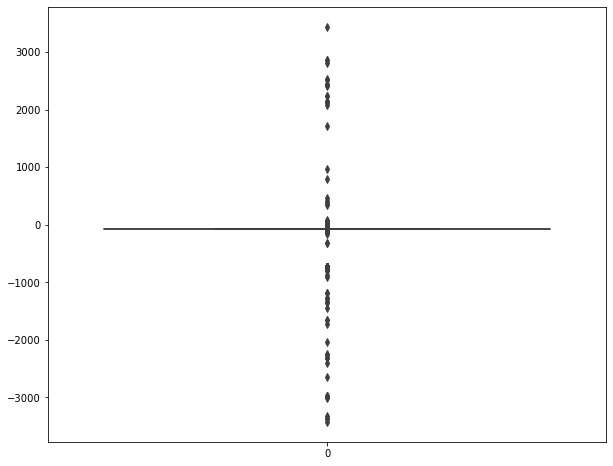

In [6]:
# 박스플롯
plt.figure(figsize=(10,8))
sns.boxplot(data=train['pickup_longitude'])
plt.show()

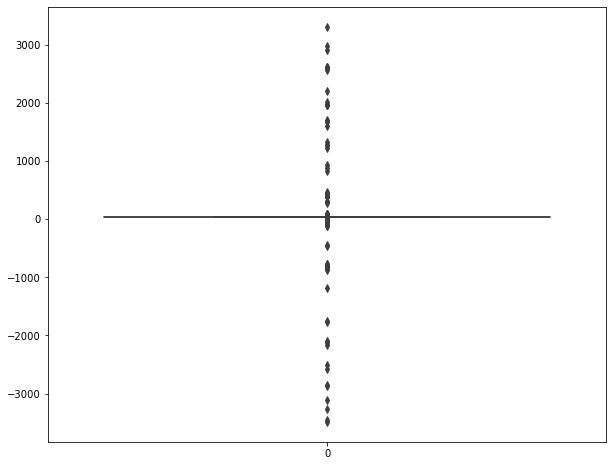

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train['pickup_latitude'])
plt.show()

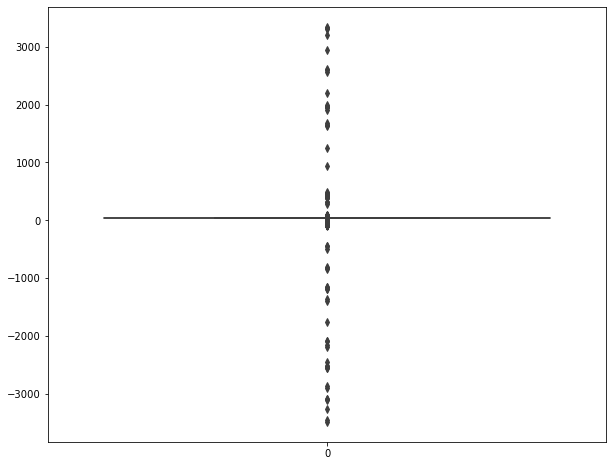

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train['dropoff_latitude'])
plt.show()

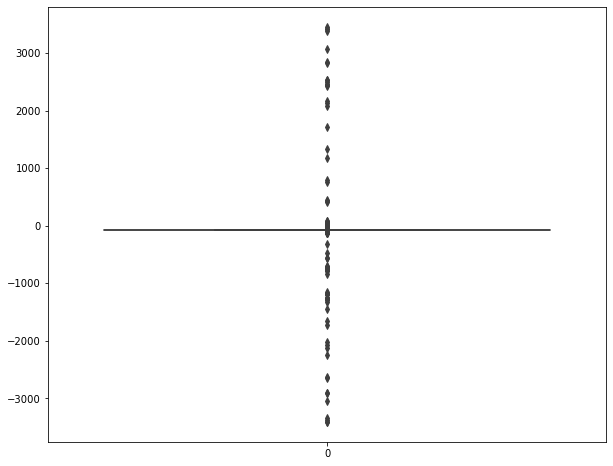

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train['dropoff_longitude'])
plt.show()

뉴욕의 위도와 경도 좌표: -73.990494, 40.7569545

In [10]:
for c in ['pickup_longitude','pickup_latitude', 'dropoff_longitude','dropoff_latitude']:
    print(max(train[c]), min(train[c]))

3439.425565 -3426.60895
3310.364462 -3488.079513
3457.62235 -3412.653087
3345.917353 -3488.079513


In [11]:
# 이상치 제거 함수

def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((data>upper_bound)|(data<lower_bound))

# IQR = train['pickup_longitude'].quantile(0.75) - train['pickup_longitude'].quantile(0.25)
# train['pickup_longitude'].quantile(0.75)+(1.5*IQR)

In [12]:
for column in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    globals()['{}_index'.format(column)] = outliers_iqr(train[column])[0]

In [13]:
outlier_index = np.concatenate((pickup_longitude_index, pickup_latitude_index, dropoff_longitude_index, dropoff_latitude_index))

In [14]:
train.index

RangeIndex(start=0, stop=5000000, step=1)

In [15]:
outlier_index

array([      0,      11,      15, ..., 4999924, 4999951, 4999979],
      dtype=int64)

In [23]:
not_outlier_index = []
for i in train.index:
    if i not in outlier_index:
        not_outlier_index.append(i)

KeyboardInterrupt: 

In [ ]:
## 다시

In [16]:
train.drop(index=outlier_index)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
...,...,...,...,...,...,...,...,...
4999995,2011-01-24 21:33:44.0000003,16.5,2011-01-24 21:33:44 UTC,-74.003883,40.725772,-73.969391,40.800830,1
4999996,2013-10-11 12:12:00.000000118,9.0,2013-10-11 12:12:00 UTC,-73.995105,40.739897,-73.985217,40.731950,2
4999997,2014-12-06 23:04:28.0000002,10.5,2014-12-06 23:04:28 UTC,-73.981063,40.764125,-73.979259,40.781857,2
4999998,2015-05-30 19:01:24.0000004,10.0,2015-05-30 19:01:24 UTC,-73.965401,40.759140,-73.971886,40.750870,1


결측치 처리

In [24]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [25]:
train = train.dropna()

In [26]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

파생변수

In [13]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [17]:
from haversine import haversine, Unit

In [21]:
pickup = train[['pickup_latitude','pickup_longitude']]
pd.DataFrame(pickup)
dropoff = train[['dropoff_latitude','dropoff_longitude']]
pd.DataFrame(dropoff)

,dropoff_latitude,dropoff_longitude
0,40.712278,-73.841610
1,40.782004,-73.979268
2,40.750562,-73.991242
3,40.758092,-73.991567
4,40.783762,-73.956655
...,...,...
4999995,40.800830,-73.969391
4999996,40.731950,-73.985217
4999997,40.781857,-73.979259
4999998,40.750870,-73.971886


In [18]:
from geopy.distance import distance

In [19]:
distance = []

In [30]:
dist = []
for i in range(train.shape[0]):
    temp = distance(pickup.values[i], dropoff.values[i]).miles
    dist.append(temp)
#     pickup_coord = (train["pickup_latitude"][i], train["pickup_longitude"][i])
#     dropoff_coord = (train["dropoff_latitude"][i], train["dropoff_longitude"][i])
#     temp = haversine(pickup_coord, dropoff_coord, unit = 'm')
#     distance.append(temp)

TypeError: 'list' object is not callable

전처리